In [180]:
# Import dependencies
import pandas as pd
from pymongo import MongoClient
from pprint import pprint
import seaborn as sns

In [181]:
# Read our data file with the Pandas library
sp500_df = pd.read_csv("data.csv", encoding = "ISO-8859-1")

In [182]:
# Show the first five rows.
sp500_df.head()

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
0,dis,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/ef50b4a2b263c84...,https://thewaltdisneycompany.com/,A,High,BB,...,BB,Medium,510,316,321,1147,19-04-2022,BBB,High,1744489
1,gm,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,https://static.finnhub.io/logo/9253db78-80c9-1...,https://www.gm.com/,A,High,BB,...,B,Medium,510,303,255,1068,17-04-2022,BBB,High,1467858
2,gww,WW Grainger Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Trading Companies and Distributors,https://static.finnhub.io/logo/f153dcda-80eb-1...,https://www.grainger.com/,B,Medium,BB,...,B,Medium,255,385,240,880,19-04-2022,BB,Medium,277135
3,mhk,Mohawk Industries Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Consumer products,https://static.finnhub.io/logo/26868a62-80ec-1...,https://mohawkind.com/,A,High,B,...,BB,Medium,570,298,303,1171,18-04-2022,BBB,High,851968
4,lyv,Live Nation Entertainment Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/1cd144d2-80ec-1...,https://www.livenationentertainment.com/,BBB,High,BB,...,B,Medium,492,310,250,1052,18-04-2022,BBB,High,1335258


<Axes: >

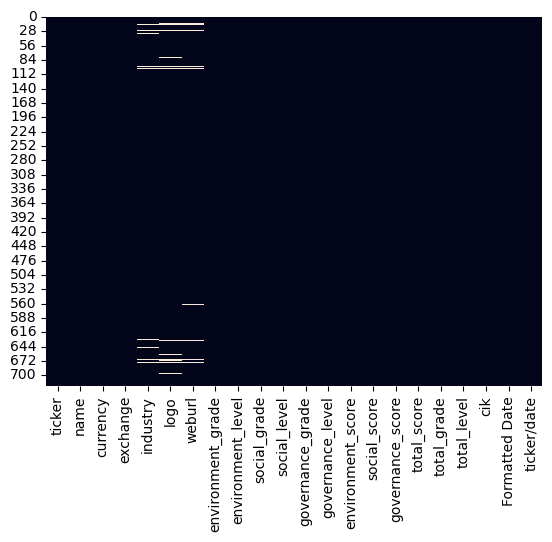

In [183]:
sns.heatmap(data_df.isnull(), cbar = False)

In [184]:
# Convert the 'Date' column to datetime
sp500_df["last_processing_date"] = pd.to_datetime(sp500_df["last_processing_date"], format = "mixed")

# Change the format to mm/dd/yyyy
sp500_df["Formatted Date"] = sp500_df["last_processing_date"].dt.strftime("%m/%d/%Y")

print(sp500_df[["last_processing_date", "Formatted Date"]])

    last_processing_date Formatted Date
0             2022-04-19     04/19/2022
1             2022-04-17     04/17/2022
2             2022-04-19     04/19/2022
3             2022-04-18     04/18/2022
4             2022-04-18     04/18/2022
..                   ...            ...
717           2022-07-11     07/11/2022
718           2022-07-11     07/11/2022
719           2022-07-11     07/11/2022
720           2022-11-15     11/15/2022
721           2022-07-11     07/11/2022

[722 rows x 2 columns]


In [185]:
# Drop the "last_processing_date" column
data_df = sp500_df.drop(columns=["last_processing_date"])

In [186]:
# 
data_df["ticker"] = data_df["ticker"].str.upper()

In [187]:
# 
data_df["ticker/date"] = data_df["ticker"] + data_df["Formatted Date"]

In [190]:
data_df.head()

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_level,environment_score,social_score,governance_score,total_score,total_grade,total_level,cik,Formatted Date,ticker/date
0,DIS,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/ef50b4a2b263c84...,https://thewaltdisneycompany.com/,A,High,BB,...,Medium,510,316,321,1147,BBB,High,1744489,04/19/2022,DIS04/19/2022
1,GM,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,https://static.finnhub.io/logo/9253db78-80c9-1...,https://www.gm.com/,A,High,BB,...,Medium,510,303,255,1068,BBB,High,1467858,04/17/2022,GM04/17/2022
2,GWW,WW Grainger Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Trading Companies and Distributors,https://static.finnhub.io/logo/f153dcda-80eb-1...,https://www.grainger.com/,B,Medium,BB,...,Medium,255,385,240,880,BB,Medium,277135,04/19/2022,GWW04/19/2022
3,MHK,Mohawk Industries Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Consumer products,https://static.finnhub.io/logo/26868a62-80ec-1...,https://mohawkind.com/,A,High,B,...,Medium,570,298,303,1171,BBB,High,851968,04/18/2022,MHK04/18/2022
4,LYV,Live Nation Entertainment Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/1cd144d2-80ec-1...,https://www.livenationentertainment.com/,BBB,High,BB,...,Medium,492,310,250,1052,BBB,High,1335258,04/18/2022,LYV04/18/2022


In [191]:
# Save the DataFrame to a CSV file
data_df.to_csv("sp500.csv", index = False)

In [192]:
# Read our data file with the Pandas library
open_close_df = pd.read_csv("datefilteredesgdata.csv", encoding = "ISO-8859-1")

In [193]:
# Show the first five rows.
open_close_df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2022-01-03,MMM,146.910370,148.612045,149.740799,147.023407,149.096985,2309117.0
1,2022-01-04,MMM,148.968475,150.693985,151.555191,148.854507,149.230774,3016551.0
2,2022-01-05,MMM,148.356827,150.075256,151.989960,147.993317,148.102005,3531070.0
3,2022-01-06,MMM,147.125275,148.829437,151.571899,148.444809,151.237457,2996458.0
4,2022-01-07,MMM,148.737030,150.459869,150.911377,148.177261,148.938126,3349039.0


In [194]:
# Convert the "Date" column to datetime for open_close_df
open_close_df["Date"] = pd.to_datetime(open_close_df["Date"])

In [195]:
# Change the format to mm/dd/yyyy
open_close_df["Formatted Date"] = open_close_df["Date"].dt.strftime("%m/%d/%Y")

print(open_close_df[["Date", "Formatted Date"]])

             Date Formatted Date
0      2022-01-03     01/03/2022
1      2022-01-04     01/04/2022
2      2022-01-05     01/05/2022
3      2022-01-06     01/06/2022
4      2022-01-07     01/07/2022
...           ...            ...
126248 2022-12-23     12/23/2022
126249 2022-12-27     12/27/2022
126250 2022-12-28     12/28/2022
126251 2022-12-29     12/29/2022
126252 2022-12-30     12/30/2022

[126253 rows x 2 columns]


In [196]:
open_close_df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Formatted Date
0,2022-01-03,MMM,146.910370,148.612045,149.740799,147.023407,149.096985,2309117.0,01/03/2022
1,2022-01-04,MMM,148.968475,150.693985,151.555191,148.854507,149.230774,3016551.0,01/04/2022
2,2022-01-05,MMM,148.356827,150.075256,151.989960,147.993317,148.102005,3531070.0,01/05/2022
3,2022-01-06,MMM,147.125275,148.829437,151.571899,148.444809,151.237457,2996458.0,01/06/2022
4,2022-01-07,MMM,148.737030,150.459869,150.911377,148.177261,148.938126,3349039.0,01/07/2022


<Axes: >

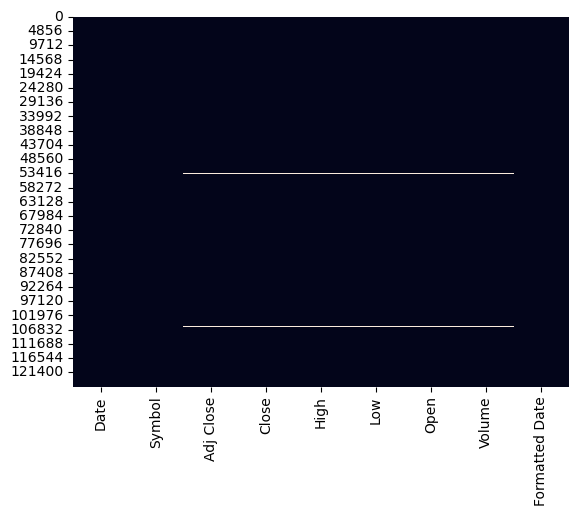

In [197]:
sns.heatmap(open_close_df.isnull(), cbar = False)

In [198]:
# Drop the "last_processing_date" column
new_df = open_close_df.drop(columns=["Date"])

In [199]:
# Rename the column "Symbol"
new_df.rename(columns = {"Symbol": "ticker"}, inplace = True)

In [200]:

new_df["ticker/date"] = new_df["ticker"] + new_df["Formatted Date"]

In [201]:
new_df.head()

,ticker,Adj Close,Close,High,Low,Open,Volume,Formatted Date,ticker/date
0,MMM,146.910370,148.612045,149.740799,147.023407,149.096985,2309117.0,01/03/2022,MMM01/03/2022
1,MMM,148.968475,150.693985,151.555191,148.854507,149.230774,3016551.0,01/04/2022,MMM01/04/2022
2,MMM,148.356827,150.075256,151.989960,147.993317,148.102005,3531070.0,01/05/2022,MMM01/05/2022
3,MMM,147.125275,148.829437,151.571899,148.444809,151.237457,2996458.0,01/06/2022,MMM01/06/2022
4,MMM,148.737030,150.459869,150.911377,148.177261,148.938126,3349039.0,01/07/2022,MMM01/07/2022


In [202]:
# Save the DataFrame to a CSV file
new_df.to_csv("open_close.csv", index = False)

```
Within this markdown cell, copy the line of text you used to import the data from your Terminal. This way, future analysts will be able to repeat your process.
e.g.: Import the dataset with :
                                "mongoimport --type csv -d SP500 -c open_close --headerline --drop open_close.csv"
                                "mongoimport --type csv -d SP500 -c SP500_ESG --headerline --drop sp500.csv"
```

In [214]:
# Create an instance of MongoClient
mongo = MongoClient(port = 27017)

In [215]:
# Confirm that our new database was created
MongoDB = mongo.list_database_names()
print(MongoDB)

['SP500', 'admin', 'autosaurus', 'classDB', 'config', 'epa', 'fruits_db', 'gardenDB', 'local', 'petsitly_marketing', 'travel_db', 'uk_food']


In [216]:
# Assign the uk_food database to a variable name
db = mongo["SP500"]

In [217]:
# Fetch data from collections
SP500_ESG = db["SP500"]
open_close = db["SP500"]

In [218]:
# Review the collections in our new database
collections = db.list_collection_names()
print(collections)

['open_close', 'SP500_ESG']


In [219]:
# review a document in the SP500_ESG collection
one_doc = db.SP500_ESG.find_one()
pprint(one_doc)

{'Formatted Date': '04/19/2022',
 '_id': ObjectId('66207532148fecfa8a159d06'),
 'cik': 1744489,
 'currency': 'USD',
 'environment_grade': 'A',
 'environment_level': 'High',
 'environment_score': 510,
 'exchange': 'NEW YORK STOCK EXCHANGE, INC.',
 'governance_grade': 'BB',
 'governance_level': 'Medium',
 'governance_score': 321,
 'industry': 'Media',
 'logo': 'https://static.finnhub.io/logo/ef50b4a2b263c847211b567a01edb702cae8b9ef46ca1f6856ca4432a70e9f52.png',
 'name': 'Walt Disney Co',
 'social_grade': 'BB',
 'social_level': 'Medium',
 'social_score': 316,
 'ticker': 'DIS',
 'ticker/date': 'DIS04/19/2022',
 'total_grade': 'BBB',
 'total_level': 'High',
 'total_score': 1147,
 'weburl': 'https://thewaltdisneycompany.com/'}


In [220]:
# review a document in the open_close collection
one_doc = db.open_close.find_one()
pprint(one_doc)

{'Adj Close': 148.96847534179688,
 'Close': 150.69398498535156,
 'Formatted Date': '01/04/2022',
 'High': 151.55519104003906,
 'Low': 148.85450744628906,
 'Open': 149.23077392578125,
 'Volume': 3016551.0,
 '_id': ObjectId('6620751f4844cc0adb0ae01a'),
 'ticker': 'MMM',
 'ticker/date': 'MMM01/04/2022'}


In [223]:
# Merge data from 'open_close' and 'SP500_ESG' collections
result = db.SP500_ESG.aggregate([
    {
        "$lookup": {
            "from": "open_close",
            "localField": "ticker/date",
            "foreignField": "ticker/date",
            "as": "merged_data"
        }
    }
])

# Create a new collection and insert the merged data
merged_collection = db["sp500_esg_date"]
for doc in result:
    merged_collection.insert_one(doc)

print("Merged data inserted into 'merged_collection' successfully!")

Merged data inserted into 'merged_collection' successfully!


In [224]:
# Fetch data from the collection
cursor = merged_collection.find({})
data = list(cursor)

# Create a DataFram
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv("sp500_esg_date.csv", index = False)